Welcome to Week 5!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. ![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine.
.

In [ ]:
#run this once per kernal crash
!wget https://github.com/MohamedElashri/ROOT/releases/download/ubuntu/root_v6.28.04_Ubuntu_20.04.zip
!unzip /content/root_v6.28.04_Ubuntu_20.04.zip
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion
!apt-get install libpython3.6-dev

Streaming output truncated to the last 5000 lines.
  inflating: root_build/tutorials/hsimple.root  
   creating: root_build/tutorials/gui/
  inflating: root_build/tutorials/gui/iconAsXPMData.C  
  inflating: root_build/tutorials/gui/splitterVertical.C  
  inflating: root_build/tutorials/gui/guitest_playback.C  
  inflating: root_build/tutorials/gui/customTH1Fmenu.C  
  inflating: root_build/tutorials/gui/worldmap.jpg  
  inflating: root_build/tutorials/gui/calendar.C  
  inflating: root_build/tutorials/gui/mditest.C  
  inflating: root_build/tutorials/gui/Slider3Demo.C  
  inflating: root_build/tutorials/gui/mditestbg.xpm  
  inflating: root_build/tutorials/gui/textEntries.C  
  inflating: root_build/tutorials/gui/ntupleTableTest.C  
  inflating: root_build/tutorials/gui/customContextMenu.C  
  inflating: root_build/tutorials/gui/splitterHorizontal.C  
  inflating: root_build/tutorials/gui/guiWithCINT.C  
  inflating: root_build/tutorials/gui/CPUMeter.C  
  inflating: root_build/tutori

In [ ]:
# The following is needed because colab upgraded the openssl library
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2_amd64.deb

--2024-03-10 08:50:15--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 185.125.190.36, 185.125.190.39, 91.189.91.81, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|185.125.190.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1318204 (1.3M) [application/x-debian-package]
Saving to: ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’

libssl1.1_1.1.1f-1u 100%[===================>]   1.26M  1.96MB/s    in 0.6s    

2024-03-10 08:50:16 (1.96 MB/s) - ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’ saved [1318204/1318204]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 121899 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.1f-1ubuntu2_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like p

In [ ]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")
import ctypes
ctypes.cdll.LoadLibrary('/content/root_build/lib//libCore.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libThread.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libTreePlayer.so')


<CDLL '/content/root_build/lib//libTreePlayer.so', handle 5cf52e882900 at 0x78631e56afb0>

Welcome to JupyROOT 6.28/04


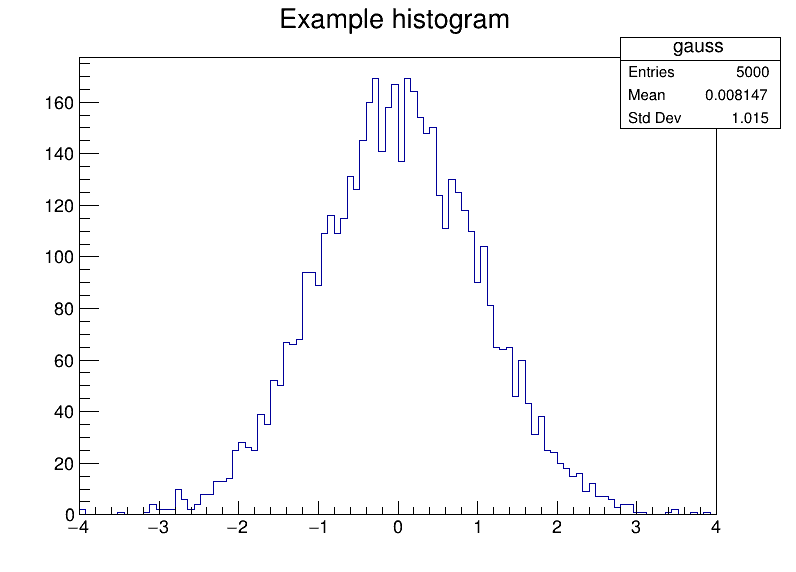

In [ ]:
#Now we can check if we have everything working as we expect:
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

All being well - this should give no errors and we should have some kind of Gaussian distribution above.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/17323/files/3634864?module_item_id=644095

Then upload it directly. You can also run the following:

In [ ]:
!mkdir LHCb_Data && cd LHCb_Data && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root

--2024-03-10 08:50:21--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root
Resolving opendata.cern.ch (opendata.cern.ch)... 137.138.6.31, 2001:1458:201:8b::100:1c8
Connecting to opendata.cern.ch (opendata.cern.ch)|137.138.6.31|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 666484974 (636M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetDown.root’

B2HHH_MagnetDown.ro 100%[===================>] 635.61M  27.5MB/s    in 24s     

2024-03-10 08:50:45 (26.7 MB/s) - ‘B2HHH_MagnetDown.root’ saved [666484974/666484974]



[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #0 because H1_PZ cannot accommodate the value 51820.2
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #1 because H1_PX cannot accommodate the value -4985.13
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #2 because H1_PZ cannot accommodate the value 90762.7
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #3 because H1_PY cannot accommodate the value 3413.79
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(data) Ignored 4967545 out-of-range events


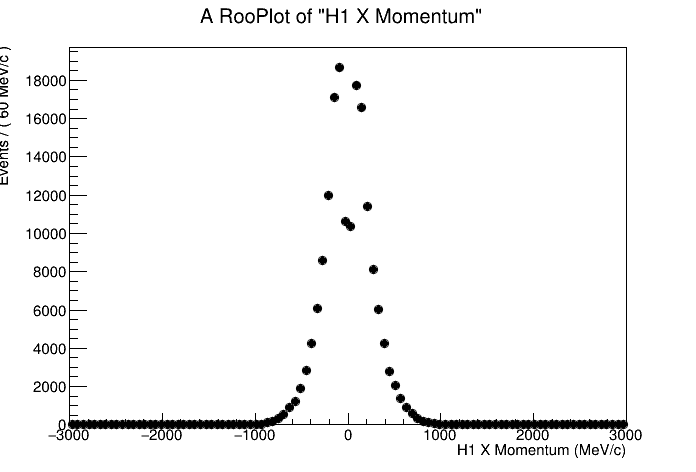

In [ ]:

#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open("/content/LHCb_Data/B2HHH_MagnetDown.root", "READONLY")
#From our file, we have to extract the DecayTree
tree=f.Get("DecayTree")
#Now we can grab some variables as a test:
ymomentum = ROOT.RooRealVar("H1_PY","H1 Y Momentum",-3000,3000,"MeV/c")
xmomentum = ROOT.RooRealVar("H1_PX","H1 X Momentum",-3000,3000,"MeV/c")
zmomentum = ROOT.RooRealVar("H1_PZ","H1 Z Momentum",-3000,3000,"MeV/c")
# We then create a dataset for us to play with
data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")
# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("c","c")
frame = xmomentum.frame()
data.plotOn(frame)
frame.Draw()
c.Draw()

* *A TTree is a collection of branches, each containing data. Here, "DecayTree" contains data related to particle decay events. --> h-hh+h- decays.*

* *Defining RooRealVar variables: Three RooRealVar objects are created representing momentum components (x, y, and z) of a particle (H1). RooRealVar is a class in ROOT used for defining variables that can be included in datasets for analysis. The range of momentum values is specified as -3000 to 3000 MeV/c.*

* *Creating a RooDataSet: A RooDataSet named "data" is created using the variables defined earlier (xmomentum, ymomentum, zmomentum). This dataset is populated with data from the "DecayTree" TTree. The condition "1==1" indicates that all events in the tree should be included.*


#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions.

Let's get started with working with this data:

In [ ]:
#installing uproot to decrease crashes
!pip install uproot awkward lz4 xxhash
import uproot
f=uproot.open ("/content/LHCb_Data/B2HHH_MagnetDown.root")
f.keys()
#finding data with uproot
f["DecayTree"].show()
#f["DecayTree/H1_PX"].array()
#f["DecayTree/H1_PX"].array(library="pd")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.1/348.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.4/706.4 kB 24.7 MB/s eta 0:00:00
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double             

In [ ]:
pip install boost-histogram

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.5 MB/s eta 0:00:00


In [ ]:
#import numpy as np
import math
from numpy import sqrt
#import ROOT
import uproot
from matplotlib import pyplot as plt
import boost_histogram as bh

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable called H1_Ptot:



In [ ]:
#Here make a plot of the Total momentum of each of the three daughters

To plot the total momentum of each of the three daughters, I first calculate the total momentum for each daughter particle from their individual momentum components (x, y, z).

In [ ]:
#WITH UPROOT
#daughter particle 1
xmomentum_H1 = f["DecayTree//H1_PX"].array()
ymomentum_H1 = f["DecayTree//H1_PY"].array()
zmomentum_H1 = f["DecayTree//H1_PZ"].array()

 Then, I  created a new variable representing the total momentum for each daughter and use that variable to plot the data.

Text(0, 0.5, 'Number of events')

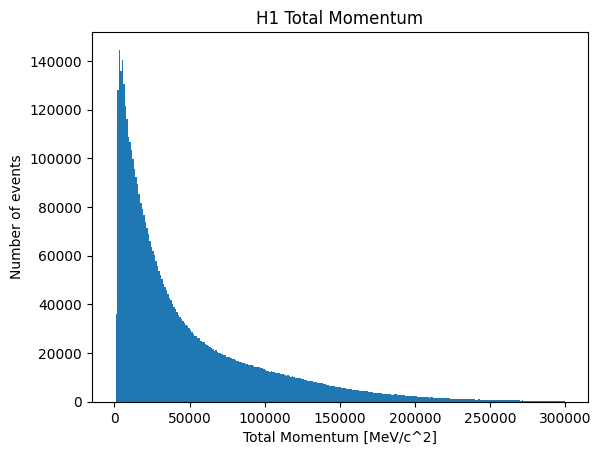

In [ ]:
H1_Ptot = ((xmomentum_H1**2)+(ymomentum_H1**2)+(zmomentum_H1**2))**0.5

plt.figure(1)
histPtot1 = bh.Histogram(bh.axis.Regular(300,0,300000))
histPtot1.fill(H1_Ptot)
plt.bar(histPtot1.axes[0].centers, histPtot1.values(), width=histPtot1.axes[0].widths)
plt.title('H1 Total Momentum')
plt.xlabel('Total Momentum [MeV/c^2]')
plt.ylabel('Number of events')

Text(0, 0.5, 'Number of events')

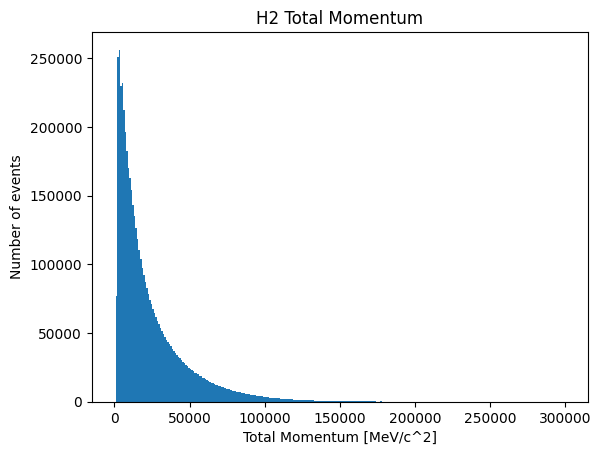

In [ ]:
#daughter particle 2
xmomentum_H2 = f["DecayTree//H2_PX"].array()
ymomentum_H2 = f["DecayTree//H2_PY"].array()
zmomentum_H2 = f["DecayTree//H2_PZ"].array()
H2_Ptot = ((xmomentum_H2**2)+(ymomentum_H2**2)+(zmomentum_H2**2))**0.5


plt.figure(2)
histPtot2 = bh.Histogram(bh.axis.Regular(300,0,300000))
histPtot2.fill(H2_Ptot)
plt.bar(histPtot2.axes[0].centers, histPtot2.values(), histPtot2.axes[0].widths)
plt.title('H2 Total Momentum')
plt.xlabel('Total Momentum [MeV/c^2]')
plt.ylabel('Number of events')

Text(0, 0.5, 'Number of events')

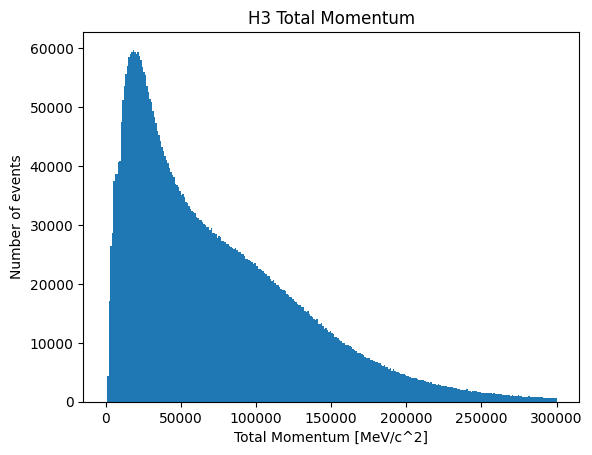

In [ ]:
#daughter particle 3
xmomentum_H3 = f["DecayTree//H3_PX"].array()
ymomentum_H3 = f["DecayTree//H3_PY"].array()
zmomentum_H3 = f["DecayTree//H3_PZ"].array()
H3_Ptot = ((xmomentum_H3**2)+(ymomentum_H3**2)+(zmomentum_H3**2))**0.5

plt.figure(3)
histPtot3 = bh.Histogram(bh.axis.Regular(300,0,300000))
histPtot3.fill(H3_Ptot)
plt.bar(histPtot3.axes[0].centers, histPtot3.values(), histPtot3.axes[0].widths)
plt.title('H3 Total Momentum')
plt.xlabel('Total Momentum [MeV/c^2]')
plt.ylabel('Number of events')

Now plot the total momentum for the mother (M_Ptot)

Text(0, 0.5, 'Number of events')

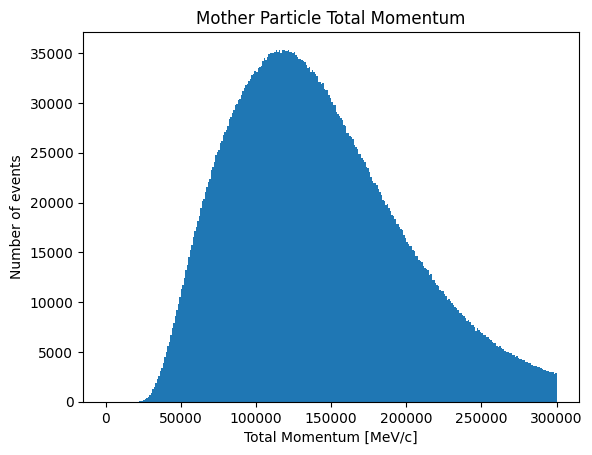

In [ ]:
M_Ptot = (
    (xmomentum_H1 + xmomentum_H2 + xmomentum_H3)**2 +
    (ymomentum_H1 + ymomentum_H2 + ymomentum_H3)**2 +
    (zmomentum_H1 + zmomentum_H2 + zmomentum_H3)**2
)**0.5

plt.figure(4)
histPtot_mother = bh.Histogram(bh.axis.Regular(300, 0, 300000))
histPtot_mother.fill(M_Ptot)
plt.bar(histPtot_mother.axes[0].centers, histPtot_mother.values(), histPtot_mother.axes[0].widths)
plt.title('Mother Particle Total Momentum')
plt.xlabel('Total Momentum [MeV/c]')
plt.ylabel('Number of events')


Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [ ]:
import uproot

# Open the ROOT file
file = uproot.open("/content/LHCb_Data/B2HHH_MagnetDown.root")

# Access the DecayTree branch
decay_tree = file["DecayTree"]

# Get entry number 45
entry_45 = decay_tree.arrays(entry_start=45, entry_stop=46)

# Print the data for entry 45
print(entry_45)

[{B_FlightDistance: 257, B_VertexChi2: 1.87, H1_PX: 420, H1_PY: -111, ...}]


We have now completed the initial steps and begun to work through what we need to with the data. This is a perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energy, we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*.

Asuming mass of a kaon is 493.677 ± 0.013 MeV.  
To calculate the total energy of the mother particle, you need to sum up the energies of each daughter particle using the above formula. E tot=∑ i(pi*c)**2+(mic**2)**2



Text(0, 0.5, 'Number of events')

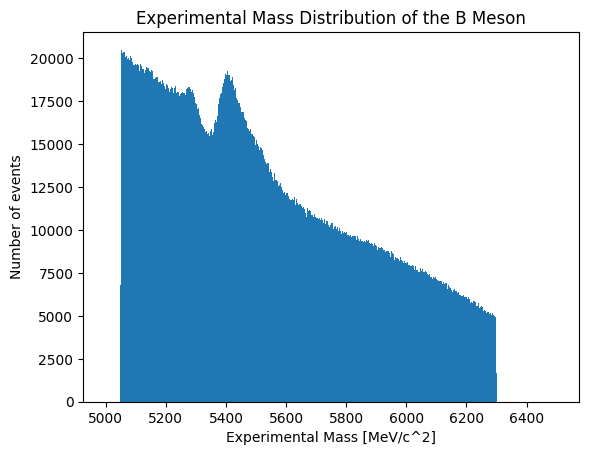

In [ ]:
#Now plot a histogram of the range of masses of the B meson.
mass_kaon = 493.677

E1=(H1_Ptot**2+mass_kaon**2)**0.5
E2=(H2_Ptot**2+mass_kaon**2)**0.5
E3=(H3_Ptot**2+mass_kaon**2)**0.5
Experimental_mass=(((E1+E2+E3)**2)-(M_Ptot)**2)**0.5

plt.figure(1)
hist_mass = bh.Histogram(bh.axis.Regular(500, 5000, 6500))  # Adjust binning as needed
hist_mass.fill(Experimental_mass)
plt.bar(hist_mass.axes[0].centers, hist_mass.values(), hist_mass.axes[0].widths)
plt.title('Experimental Mass Distribution of the B Meson')
plt.xlabel('Experimental Mass [MeV/c^2]')
plt.ylabel('Number of events')


**Does this match what we would expect from theory?**
Yes. We expect the mass of a charged B meson to be 5279.34±0.12 MeV and we see our  event of interest, so called the signal peak 5280.

*The "bump" ranged from 5300 to 5400 MeV might be missidentified background noises.*

We know that some of our particles are the B+ and some are the B- particle. There will also be some particles in our system that are not coming from a genuine B+/- or are a B+/- but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

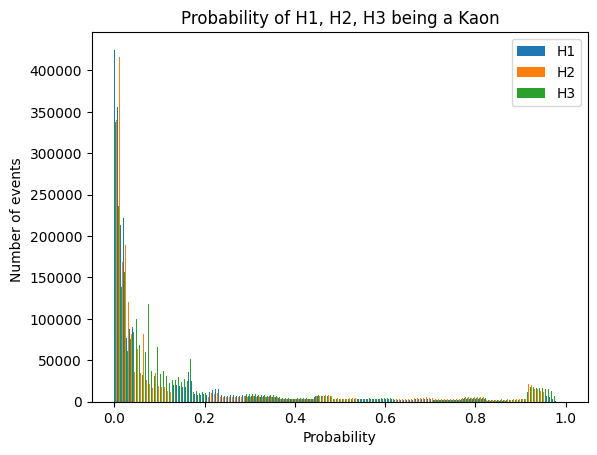

In [ ]:
#Make plots of H1/H2/H3 _ProbK on one plot
H1_ProbK = f["DecayTree//H1_ProbK"].array()
H2_ProbK = f["DecayTree//H2_ProbK"].array()
H3_ProbK = f["DecayTree//H3_ProbK"].array()
plt.hist([H1_ProbK,H2_ProbK,H3_ProbK],300,(0,1))
plt.title("Probability of H1, H2, H3 being a Kaon")
plt.ylabel("Number of events ")
plt.xlabel("Probability")
plt.legend(('H1','H2','H3'))
plt.show()

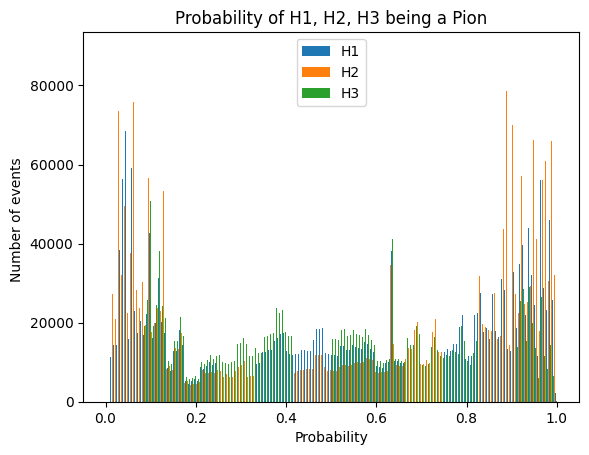

In [ ]:
#Make plots of H1/H2/H3 _ProbPi on one plot
H1_ProbPi = f["DecayTree//H1_ProbPi"].array()
H2_ProbPi = f["DecayTree//H2_ProbPi"].array()
H3_ProbPi = f["DecayTree//H3_ProbPi"].array()

plt.show()
plt.hist([H1_ProbPi,H2_ProbPi,H3_ProbPi],300,(0,1))
plt.title("Probability of H1, H2, H3 being a Pion")
plt.ylabel("Number of events ")
plt.xlabel("Probability")
plt.legend(('H1','H2','H3'))
plt.show()

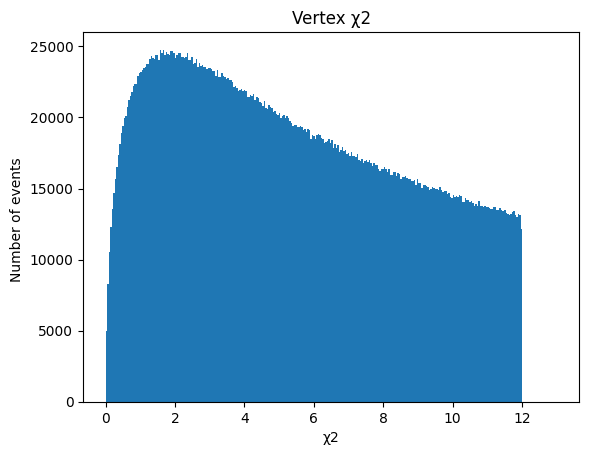

In [ ]:
#For all our particles, make a plot of the B_VertexChi2
B_VertexChi2 = f["DecayTree//B_VertexChi2"].array()
plt.hist(B_VertexChi2,300,(0,13))
plt.title("Vertex χ2")
plt.ylabel("Number of events ")
plt.xlabel("χ2")
plt.show()

Using these plots, we can now make a preselection string. This is a text string that looks like

In [ ]:
#To apply the selection - we can use the copytree command:
selection=("H1_ProbK>0.9")
cuttree = f["DecayTree"].arrays(cut=selection)

#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree

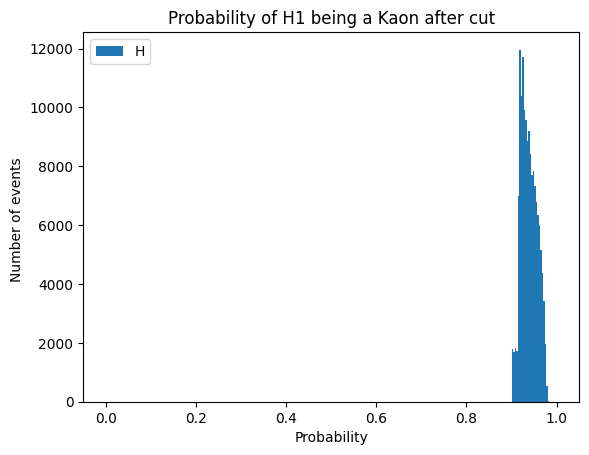

In [ ]:
#plotting the new probabilities of H1,H2,H3 being a Kaon
plt.hist(cuttree["H1_ProbK"],300,(0,1))
plt.title("Probability of H1 being a Kaon after cut")
plt.ylabel("Number of events ")
plt.xlabel("Probability")
plt.legend(('H1'))
plt.show()

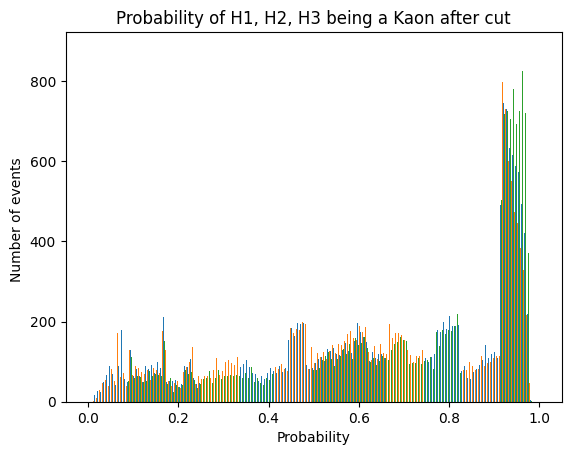

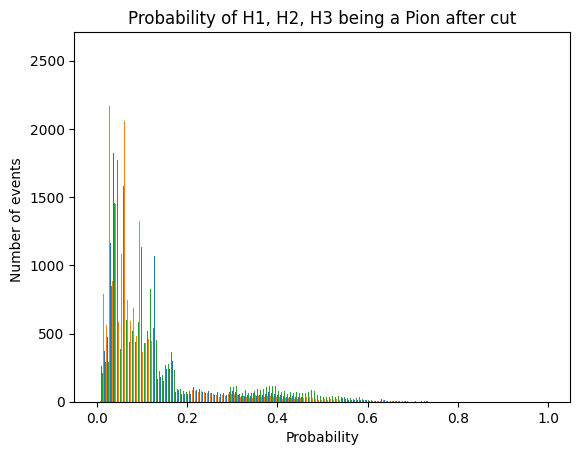

In [ ]:
#To apply the selection - we can use the copytree command:
#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree

selection = ("(H1_ProbK>H1_ProbPi)&(H2_ProbK>H2_ProbPi)&(H3_ProbK>H3_ProbPi)&(H1_isMuon==0)&(H2_isMuon==0)&(H3_isMuon==0)")
cuttree = f["DecayTree"].arrays(cut=selection)

#plotting the new probabilities of H1,H2,H3 being a Kaon/Pion
plt.hist([cuttree["H1_ProbK"],cuttree["H2_ProbK"],cuttree["H3_ProbK"]],300,(0,1))
plt.title("Probability of H1, H2, H3 being a Kaon after cut")
plt.ylabel("Number of events ")
plt.xlabel("Probability")
plt.show()
plt.hist([cuttree["H1_ProbPi"],cuttree["H2_ProbPi"],cuttree["H3_ProbPi"]],300,(0,1))
plt.title("Probability of H1, H2, H3 being a Pion after cut")
plt.ylabel("Number of events ")
plt.xlabel("Probability")
plt.show()

Text(0, 0.5, 'Number of events')

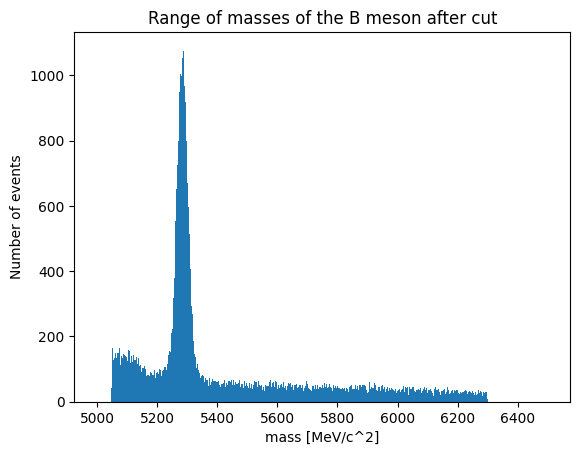

In [ ]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the tree (pre-cuts) and the CutTree (post-cuts)
H1_PtotP = ((cuttree["H1_PX"]**2)+(cuttree["H1_PY"]**2)+(cuttree["H1_PZ"]**2))**0.5
H2_PtotP = ((cuttree["H2_PX"]**2)+(cuttree["H2_PY"]**2)+(cuttree["H2_PZ"]**2))**0.5
H3_PtotP = ((cuttree["H3_PX"]**2)+(cuttree["H3_PY"]**2)+(cuttree["H3_PZ"]**2))**0.5

E1_P=(H1_PtotP**2+mass_kaon**2)**0.5
E2_P=(H2_PtotP**2+mass_kaon**2)**0.5
E3_P=(H3_PtotP**2+mass_kaon**2)**0.5

MPtot_P = ((cuttree["H1_PX"]+cuttree["H2_PX"]+cuttree["H3_PX"])**2+(cuttree["H1_PY"]+cuttree["H2_PY"]+cuttree["H3_PY"])**2+(cuttree["H1_PZ"]+cuttree["H2_PZ"]+cuttree["H3_PZ"])**2)**0.5

massM_P=(((E1_P+E2_P+E3_P)**2)-(MPtot_P)**2)**0.5

histMassM_P = bh.Histogram(bh.axis.Regular(500,5000,6500))
histMassM_P.fill(massM_P)
plt.bar(histMassM_P.axes[0].centers, histMassM_P.values(), histMassM_P.axes[0].widths)
plt.title('Range of masses of the B meson after cut')
plt.xlabel('mass [MeV/c^2]')
plt.ylabel('Number of events')


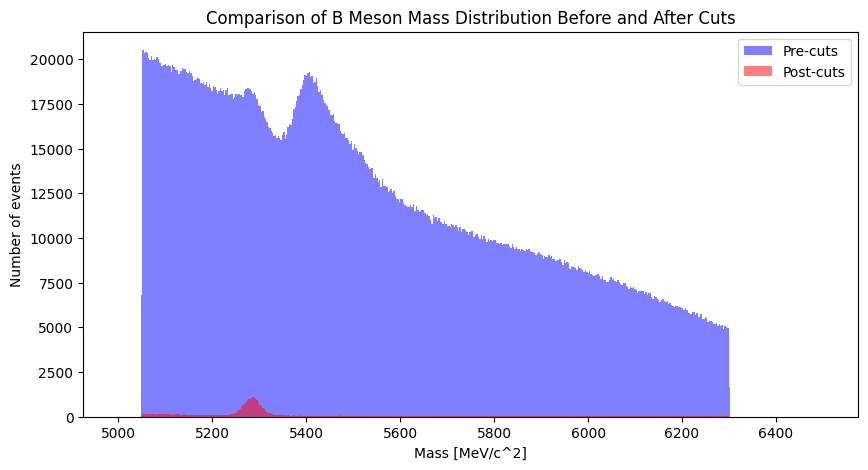

In [ ]:
# Plot both histograms on the same plot
plt.figure(figsize=(10, 5))

# Plot pre-cuts histogram in blue
hist_mass = bh.Histogram(bh.axis.Regular(500, 5000, 6500))
hist_mass.fill(Experimental_mass)
plt.bar(hist_mass.axes[0].centers, hist_mass.view(), width=hist_mass.axes[0].widths[0], color='blue', alpha=0.5, label='Pre-cuts')

# Plot post-cuts histogram in red
histMassM_P = bh.Histogram(bh.axis.Regular(500, 5000, 6500))
histMassM_P.fill(massM_P)
plt.bar(histMassM_P.axes[0].centers, histMassM_P.view(), width=histMassM_P.axes[0].widths[0], color='red', alpha=0.5, label='Post-cuts')

plt.title('Comparison of B Meson Mass Distribution Before and After Cuts')
plt.xlabel('Mass [MeV/c^2]')
plt.ylabel('Number of events')
plt.legend()
plt.show()

**What do you notice about your histogram now?**

The reduction in Background Noise leads to a cleaner peak corresponding to the B meson mass. This peak shift slightly and reduced in width due to the cuts removing certain events.
Hence, resulting in a narrower distribution.
Overall, the number of events in the histogram decreased significantly after applying the cuts since some events may have been removed due to the criteria imposed.

**IT IS EASIER TO IDENTIFY THE B MESON MASS: around 5280 MeV**

#How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

In [ ]:
# var = ROOT.RooRealVar("Variable from Python", "Nickname", Min, Max, Units)
mass = ROOT.RooRealVar("massM_P", "Mass", 5050, 5500, "MeV/C^{2}")

# Define parameters for the Gaussian signal
gaussMean = ROOT.RooRealVar("Mean", "Mean", 5300, 5250, 5350)
gaussWidth = ROOT.RooRealVar("Width", "Width", 5, 1e-6, 40)

# Define signal yield
Gauss_Norm = ROOT.RooRealVar("Gauss_Norm", "Signal Yield", 100, 0, 1000)

# Define parameters for the exponential background
exponent = ROOT.RooRealVar("exponent", "C", -0.02, -2, 2)

# Define background yield
exp_Norm = ROOT.RooRealVar("exp_Norm", "Background Yield", 100, 0, 1000)

# Define the Gaussian signal
Gauss = ROOT.RooGaussian("Gaussian Signal", "Gauss", mass, gaussMean, gaussWidth)

# Define the model for the background
Bkgnd = ROOT.RooExponential("Exponential Background", "Bkgnd", mass, exponent)

# Combine signal and background into a single PDF
model = ROOT.RooAddPdf("Full Model", "model", ROOT.RooArgList(Gauss, Bkgnd), ROOT.RooArgList(Gauss_Norm, exp_Norm))

In [ ]:
#Put data set into a RooDataSet structure

data_to_fit=ROOT.RooDataSet("Data Set","data_to_fit", ROOT.RooArgSet(mass))

#Fitting:

model.fitTo(data_to_fit)

#if everything went well, you will see the outputs of RooFit below

<cppyy.gbl.RooFitResult object at 0x(nil)>

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (Gaussian Signal,Exponential Background)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Gauss_Norm   1.00000e+02  5.00000e+01    0.00000e+00  1.00000e+03
     2 Mean         5.30000e+03  1.00000e+01    5.25000e+03  5.35000e+03
     3 Width        5.00000e+00  2.50000e+00    1.00000e-06  4.00000e+01
     4 exp_Norm     1.00000e+02  5.00000e+01    0.00000e+00  1.00000e+03
     5 exponent    -2.00000e-02  4.00000e-01   -2.00000e+00  2.00000e+00
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 

[#1] INFO:Plotting -- RooAbsPdf::plotOn(Full Model) directly selected PDF components: (Gaussian Signal)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(Full Model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(Full Model) directly selected PDF components: (Exponential Background)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(Full Model) indirectly selected PDF components: ()


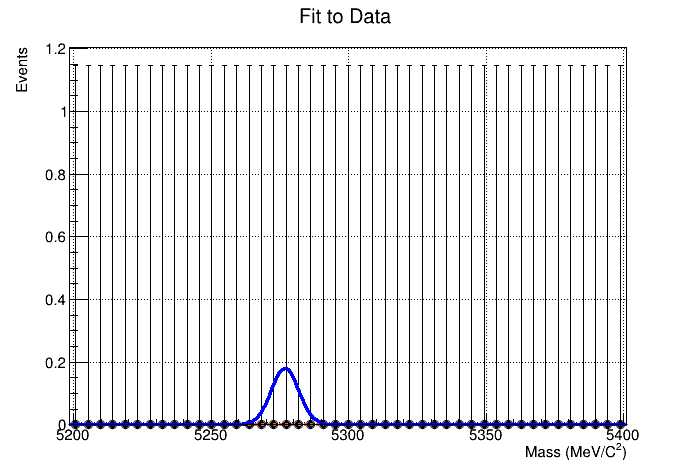

In [ ]:
# Plot
c1 = ROOT.TCanvas("c1", "c1")
c1.Draw()

# Create a frame for plotting
frame = mass.frame(ROOT.RooFit.Title("Fit to Data"))

# Plot the data
data_to_fit.plotOn(frame)

# Plot the Gaussian signal component
model.plotOn(frame, ROOT.RooFit.Components("Gaussian Signal"), ROOT.RooFit.LineColor(8), ROOT.RooFit.LineStyle(2))

# Plot the exponential background component
model.plotOn(frame, ROOT.RooFit.Components("Exponential Background"), ROOT.RooFit.LineColor(46), ROOT.RooFit.LineStyle(2))

# Plot the full model
model.plotOn(frame)

# Draw the frame
frame.Draw()

# Adjust plot settings for better visualization
c1.SetGrid()
frame.GetXaxis().SetTitle("Mass (MeV/C^{2})")
frame.GetYaxis().SetTitle("Events")
frame.SetTitleOffset(1.2, "Y")
frame.SetTitleOffset(1.0, "X")

# Zoom in to the region of interest
frame.GetXaxis().SetRangeUser(5200, 5400)

# Update canvas
c1.Update()

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do all):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

We can use the .getValV() function on our signal and background *normalisation* components, e.g. Gauss_Norm=Gauss.getValV()

To find the error (on this number) we can use .getError()

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

#Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

In [ ]:
import numpy as np

# loaded and processed data into arrays H1_Charge, H2_Charge, H3_Charge

H1_Charge = f["DecayTree//H1_Charge"].array()
H2_Charge = f["DecayTree//H2_Charge"].array()
H3_Charge = f["DecayTree//H3_Charge"].array()

# Printing the sample data for demonstration
print("H1_Charge:", H1_Charge)
print("H2_Charge:", H2_Charge)
print("H3_Charge:", H3_Charge)

H1_Charge: [-1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, ..., -1, 1, -1, 1, -1, 1, 1, 1, 1, -1]
H2_Charge: [1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, ..., 1, -1, 1, -1, 1, -1, -1, -1, -1, 1]
H3_Charge: [1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, ..., 1, -1, 1, -1, 1, -1, -1, -1, -1, 1]


In [ ]:
# Count positive charges for each event
positive_charges = H1_Charge + H2_Charge + H3_Charge

# Initialize lists to store events for B+ and B- decays
B_plus_events = []
B_minus_events = []

# Iterate through events and classify them as B+ or B-
for i, charges in enumerate(zip(H1_Charge, H2_Charge, H3_Charge)):
    total_positive_charges = sum(charge == 1 for charge in charges)

    # Check if the event is B+ or B-
    if total_positive_charges == 2:
        B_plus_events.append(i)
    elif total_positive_charges == 1:
        B_minus_events.append(i)

# Print the number of B+ and B- events
print("Number of B+ events:", len(B_plus_events))
print("Number of B- events:", len(B_minus_events))

Number of B+ events: 2610178
Number of B- events: 2525645


In [ ]:
# Calculate the number of B+ and B- events
N_B_plus = len(B_plus_events)
N_B_minus = len(B_minus_events)

# Calculate asymmetry
A = (N_B_minus - N_B_plus) / (N_B_minus + N_B_plus)

# Calculate uncertainty on the asymmetry
sigma_A = np.sqrt((1 - A**2) / (N_B_minus + N_B_plus))

# Print the results
print("Asymmetry (A):", A)
print("Uncertainty on Asymmetry (sigma_A):", sigma_A)

Asymmetry (A): -0.01645948468239657
Uncertainty on Asymmetry (sigma_A): 0.0004412006460691742


1) The calculated asymmetry value is approximately -0.0165. The negative sign indicates that there is a slight excess of B- events compared to B+ events, suggesting a slight preference for B- decays over B+ decays in your data.

2) The uncertainty value is approximately 0.00044, indicating the precision of the asymmetry measurement, indicating higher confidence in the measured asymmetry.

Overall, these results suggest a slightly higher abundance of B- decays compared to B+ decays, although the effect is relatively small compared to the uncertainty in the measurement.

#Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

The asymmetry observed contributes to the understanding of fundamental particle interactions BUT I don't think it  directly explain the excess of mass in the Universe.

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons
import numpy as np

def invariant_mass(energy1, momentum1, energy2, momentum2):
    # Calculate the total energy and momentum
    total_energy = energy1 + energy2
    total_momentum = momentum1 + momentum2

    # Calculate the invariant mass
    invariant_mass_squared = total_energy**2 - np.dot(total_momentum, total_momentum)

    # Ensure that the invariant mass squared is non-negative
    if invariant_mass_squared >= 0:
        return np.sqrt(invariant_mass_squared)
    else:
        raise ValueError("Invariant mass squared is negative. Check input values.")

In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your scatter

We can further improve our plot, since two sets of particles on each axis are exactly the same (one positive Kaon, one negative Kaon). So we can plot the maximum of the two values on one axis and the minimum on the other. We can use a quick numpy check and then plot those values.

In [ ]:
#Make the revised Dalitz plot here for B+ mesons

In [ ]:
#Make the revised Dalitz plot here for B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)